## Web Economic CW

In [101]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from pyfm import pylibfm

pd.options.mode.chained_assignment = None  # default='warn'

In [102]:
#Read CSV data
df_train = pd.read_csv('/Users/zhangyiman/Desktop/dataset/train.csv')
df_test = pd.read_csv('/Users/zhangyiman/Desktop/dataset/test.csv')
df_validation = pd.read_csv('/Users/zhangyiman/Desktop/dataset/validation.csv')
# raw_data = pd.read_csv('train.csv', header=None, sep=',')

In [103]:
#df_train['click'].value_counts()/ df_train.shape[0]

In [104]:
#df_train['click'].value_counts()

In [105]:
#df_train.info()

In [106]:
df_train.describe()

click       weekday          hour    logtype        region  \
count  2.697738e+06  2.697738e+06  2.697738e+06  2697738.0  2.697738e+06   
mean   7.539650e-04  2.891155e+00  1.346598e+01        1.0  1.494494e+02   
std    2.744807e-02  2.053776e+00  6.592290e+00        0.0  1.020496e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00        1.0  0.000000e+00   
25%    0.000000e+00  1.000000e+00  1.000000e+01        1.0  7.900000e+01   
50%    0.000000e+00  3.000000e+00  1.400000e+01        1.0  1.460000e+02   
75%    0.000000e+00  5.000000e+00  1.900000e+01        1.0  2.160000e+02   
max    1.000000e+00  6.000000e+00  2.300000e+01        1.0  3.950000e+02   

               city     slotwidth    slotheight     slotprice      bidprice  \
count  2.697738e+06  2.697738e+06  2.697738e+06  2.697738e+06  2.697738e+06   
mean   1.543936e+02  5.756453e+02  1.888990e+02  2.648484e+01  2.724582e+02   
std    1.032899e+02  3.212459e+02  1.308906e+02  3.703962e+01  2.910801e+01   
min    0.000000e+00  1.200000e+02  5.000000e+01  0.000000e+00  2.270000e+02   
25%    7.900000e+01  3.000000e+02  9.000000e+01  0.000000e+00  2.410000e+02   
50%    1.520000e+02  3.360000e+02  9.000000e+01  5.000000e+00  2.940000e+02   
75%    2.220000e+02  9.600000e+02  2.500000e+02  5.000000e+01  3.000000e+02   
max    3.990000e+02  1.000000e+03  6.000000e+02  3.000000e+02  3.000000e+02   

           payprice    advertiser  
count  2.697738e+06  2.697738e+06  
mean   8.025102e+01  2.847232e+03  
std    6.236699e+01  7.821371e+02  
min    0.000000e+00  1.458000e+03  
25%    3.300000e+01  2.259000e+03  
50%    7.000000e+01  3.358000e+03  
75%    1.010000e+02  3.427000e+03  
max    3.000000e+02  3.476000e+03

## data exploration

### single column

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

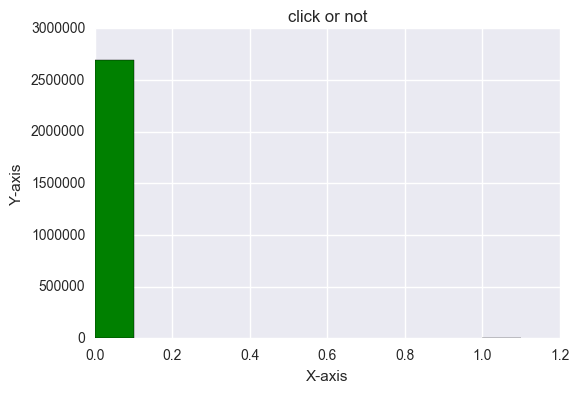

In [109]:
data = [2695704,2034]
x = [0,1]

plt.bar(x,data,0.1,color="green")  

plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("click or not")  
    
plt.show() 

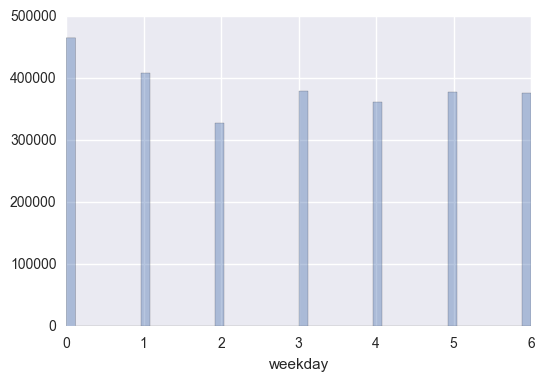

In [110]:
sns.distplot(df_train['weekday'], kde=False)
#sns.distplot(df_train['weekday'])
sns.plt.show()

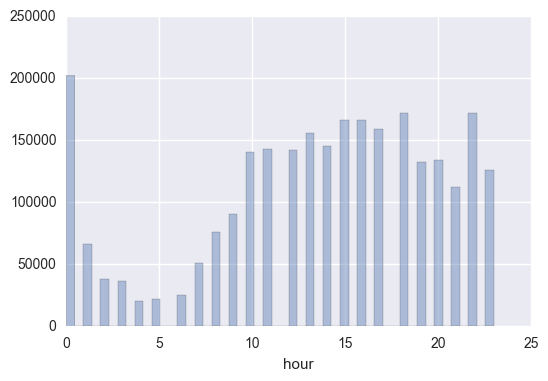

In [111]:
sns.distplot(df_train['hour'], kde=False)
sns.plt.show()

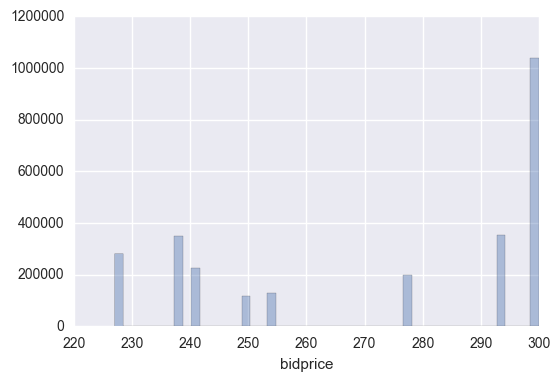

In [112]:
sns.distplot(df_train['bidprice'], kde=False)
sns.plt.show()

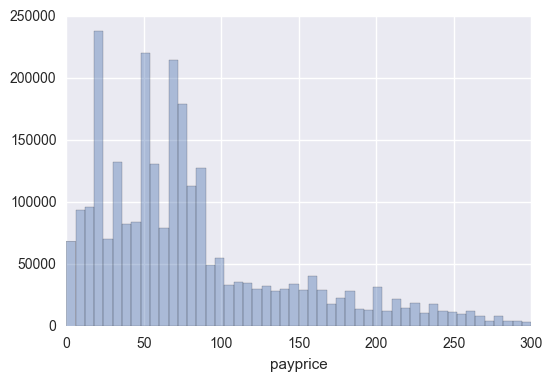

In [113]:
sns.distplot(df_train['payprice'], kde=False)
sns.plt.show()

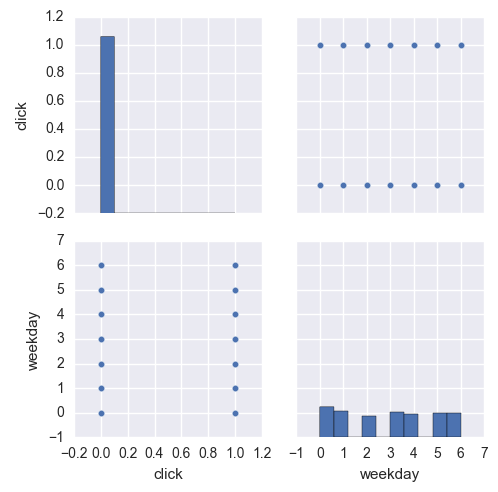

In [114]:
sns.pairplot(df_train, vars=['click', 'weekday'])
sns.plt.show()

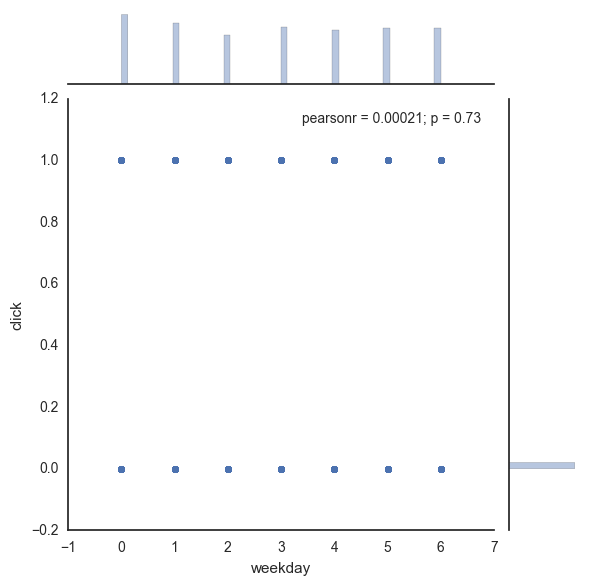

In [115]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
g = sns.jointplot(x="weekday", y="click", data=df_train)

In [116]:
weekday_1 = 0
weekday_2 = 0
weekday_3 = 0
weekday_4 = 0
weekday_5 = 0
weekday_6 = 0
weekday_7 = 0
for i in range(0,df_train.shape[0]):
    if df_train['click'][i] == 1:
        m = int(df_train['weekday'][i])
        if m == 0:
            weekday_1 = weekday_1 + 1
        if m == 1:
            weekday_2 = weekday_2 + 1
        if m == 2:
            weekday_3 = weekday_3 + 1
        if m == 3:
            weekday_4 = weekday_4 + 1
        if m == 4:
            weekday_5 = weekday_5 + 1
        if m == 5:
            weekday_6 = weekday_6 + 1
        if m == 6:
            weekday_7 = weekday_7 + 1



In [117]:
day_1 = 0
day_2 = 0
day_3 = 0
day_4 = 0
day_5 = 0
day_6 = 0
day_7 = 0
for i in range(0,df_train.shape[0]):
    if df_train['click'][i] == 0:
        m = int(df_train['weekday'][i])
        if m == 0:
            day_1 = day_1 + 1
        if m == 1:
            day_2 = day_2 + 1
        if m == 2:
            day_3 = day_3 + 1
        if m == 3:
            day_4 = day_4 + 1
        if m == 4:
            day_5 = day_5 + 1
        if m == 5:
            day_6 = day_6 + 1
        if m == 6:
            day_7 = day_7 + 1

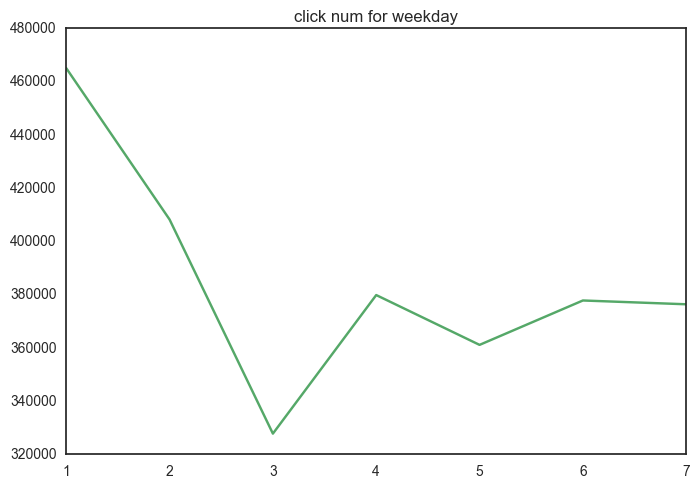

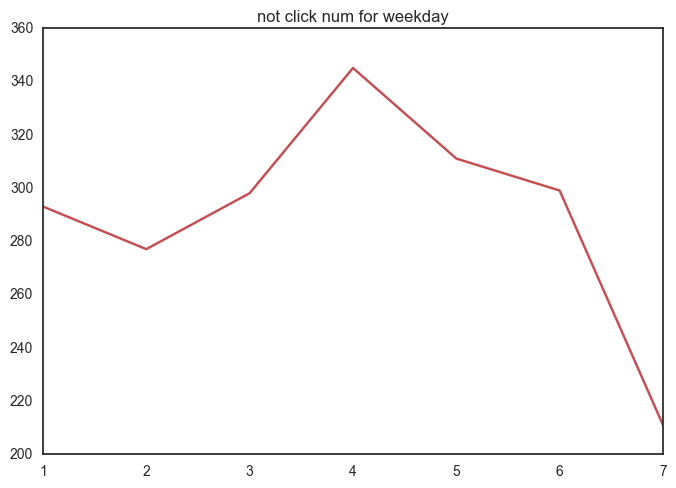

In [118]:

data = [weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7]
x = [1,2,3,4,5,6,7]
data2 = [day_1,day_2,day_3,day_4,day_5,day_6,day_7]
x = [1,2,3,4,5,6,7]
#plt.bar(x,data,0.1,color="green")  

#plt.xlabel("X-axis")  
#plt.ylabel("Y-axis")  
plt.title("click num for weekday")  
plt.plot(x, data2, color = 'g')
plt.show() 
plt.title("not click num for weekday") 
plt.plot(x, data, color = 'r')
plt.show() 

In [119]:
df_train_1 = df_train[df_train['click'] == 1]
df_train_0 = df_train[df_train['click'] == 0]

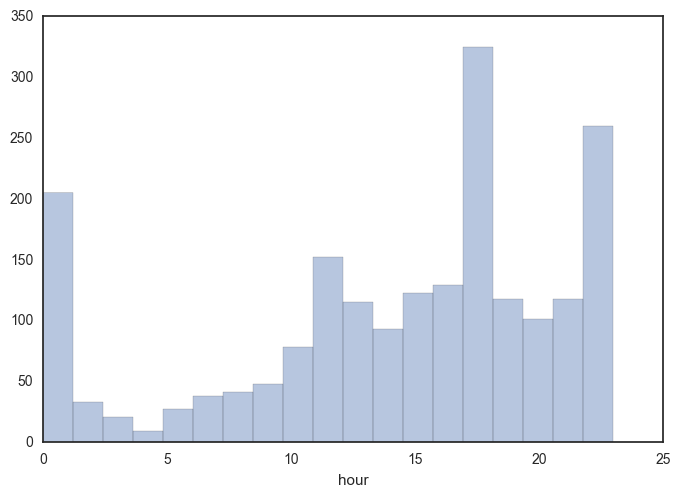

In [120]:
sns.distplot(df_train_1['hour'], kde=False)
sns.plt.show()

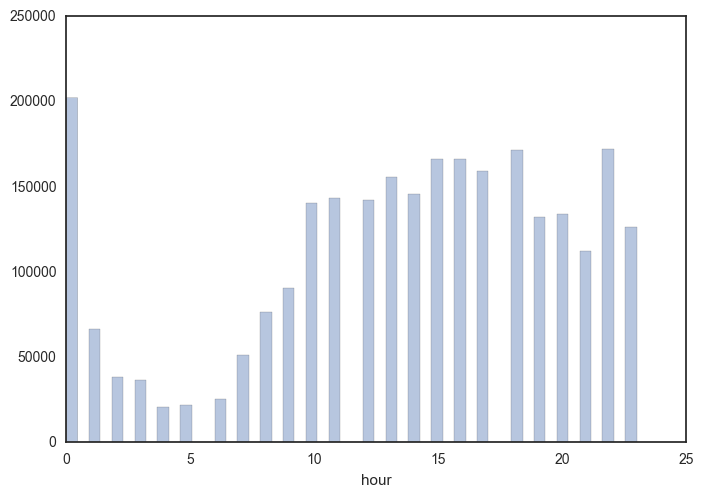

In [121]:
sns.distplot(df_train_0['hour'], kde=False)
sns.plt.show()

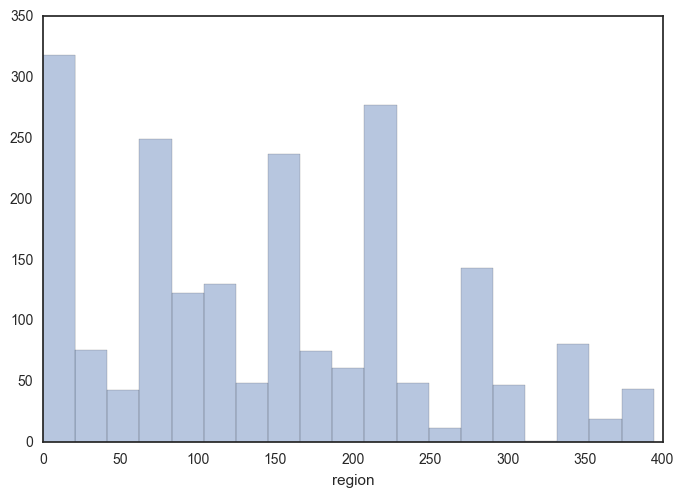

In [122]:
sns.distplot(df_train_1['region'], kde=False)
sns.plt.show()

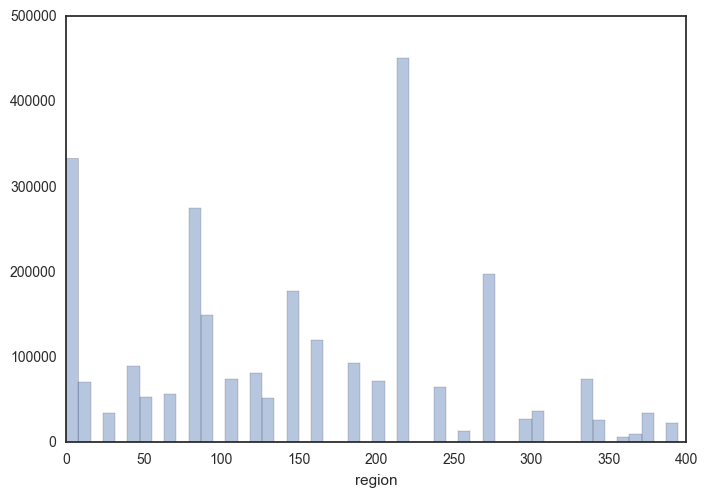

In [123]:
sns.distplot(df_train_0['region'], kde=False)
sns.plt.show()

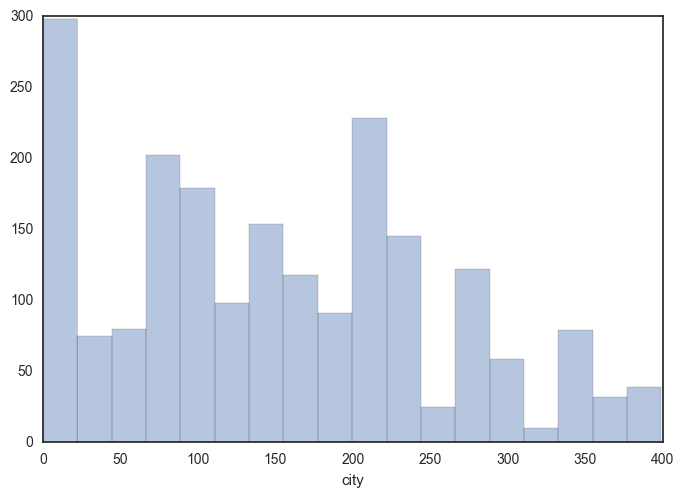

In [124]:
sns.distplot(df_train_1['city'], kde=False)
sns.plt.show()

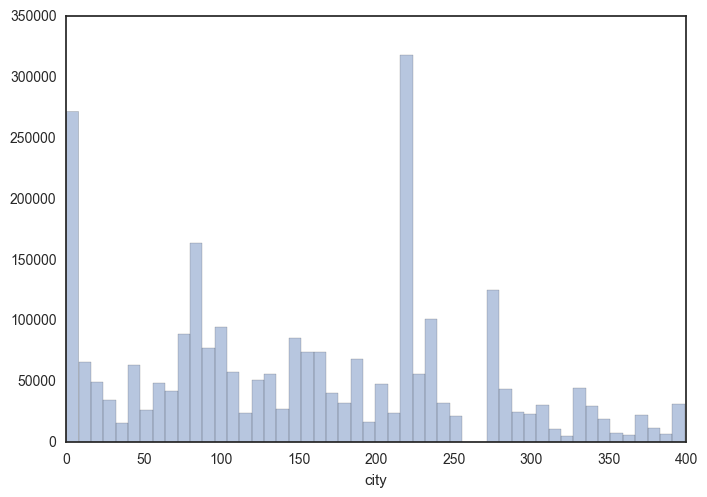

In [125]:
sns.distplot(df_train_0['city'], kde=False)
sns.plt.show()

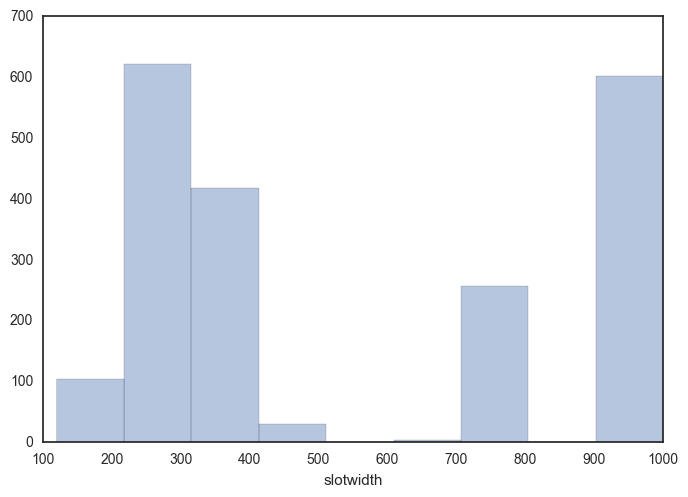

In [126]:
sns.distplot(df_train_1['slotwidth'], kde=False)
sns.plt.show()

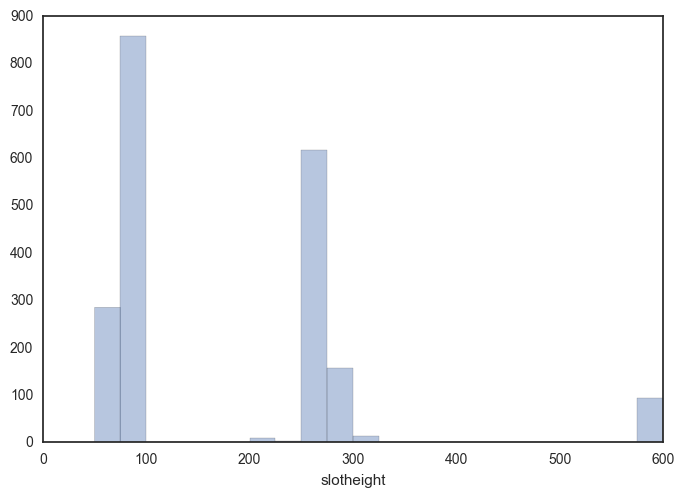

In [127]:
sns.distplot(df_train_1['slotheight'], kde=False)
sns.plt.show()

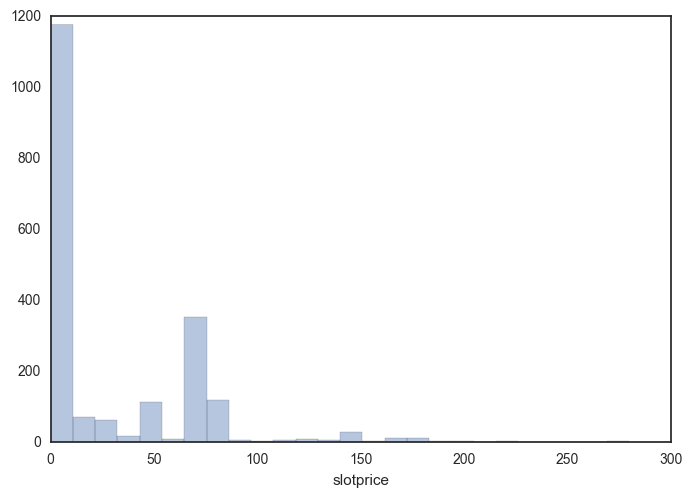

In [128]:
sns.distplot(df_train_1['slotprice'], kde=False)
sns.plt.show()

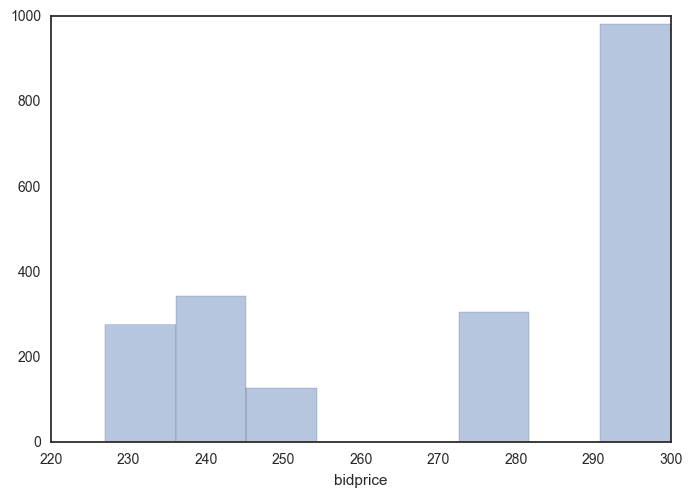

In [129]:
sns.distplot(df_train_1['bidprice'], kde=False)
sns.plt.show()

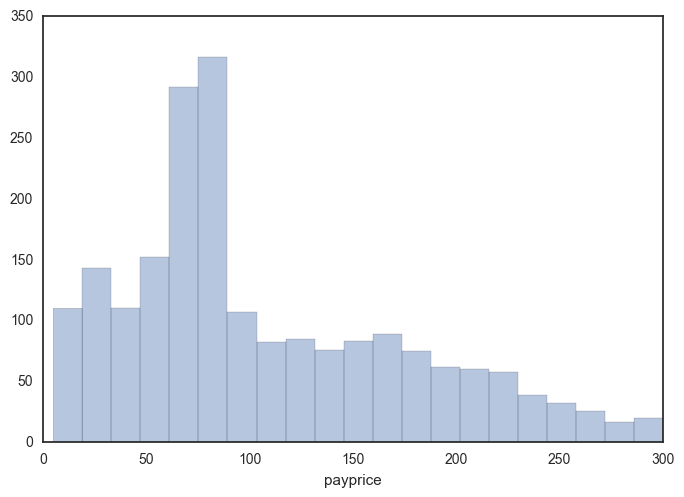

In [130]:
sns.distplot(df_train_1['payprice'], kde=False)
sns.plt.show()

In [131]:
df_train['click'].value_counts()

0    2695704
1       2034
Name: click, dtype: int64

In [132]:
df_train['advertiser'].value_counts()
#df_train['click'].value_counts()

1458    540293
3386    498554
3427    454031
3476    346778
3358    304782
2821    231416
2259    146778
2261    120619
2997     54487
Name: advertiser, dtype: int64

In [ ]:
advertiser_1 = [0,0,0,0,0,0,0]
advertiser_2 = [0,0,0,0,0,0,0]
advertiser_3 = [0,0,0,0,0,0,0]
advertiser_4 = [0,0,0,0,0,0,0]
advertiser_5 = [0,0,0,0,0,0,0]
advertiser_6 = [0,0,0,0,0,0,0]
advertiser_7 = [0,0,0,0,0,0,0]
advertiser_8 = [0,0,0,0,0,0,0]
advertiser_9 = [0,0,0,0,0,0,0]

for i in range(0,df_train.shape[0]):
    if df_train['click'][i] == 0:
        if df_train['advertiser'][i] == 1458:
            m = int(df_train['weekday'][i])
            advertiser_1[m] = advertiser_1[m]+1
        if df_train['advertiser'][i] == 3386:
            m = int(df_train['weekday'][i])
            advertiser_2[m] = advertiser_2[m]+1
        if df_train['advertiser'][i] == 3427:
            m = int(df_train['weekday'][i])
            advertiser_3[m] = advertiser_3[m]+1
        if df_train['advertiser'][i] == 3476:
            m = int(df_train['weekday'][i])
            advertiser_4[m] = advertiser_4[m]+1
        if df_train['advertiser'][i] == 3358:
            m = int(df_train['weekday'][i])
            advertiser_5[m] = advertiser_5[m]+1
        if df_train['advertiser'][i] == 2821:
            m = int(df_train['weekday'][i])
            advertiser_6[m] = advertiser_6[m]+1
        if df_train['advertiser'][i] == 2259:
            m = int(df_train['weekday'][i])
            advertiser_7[m] = advertiser_7[m]+1
        if df_train['advertiser'][i] == 2261:
            m = int(df_train['weekday'][i])
            advertiser_8[m] = advertiser_8[m]+1
        if df_train['advertiser'][i] == 2997:
            m = int(df_train['weekday'][i])
            advertiser_9[m] = advertiser_9[m]+1



In [ ]:
x = [1,2,3,4,5,6,7]
data1 = [advertiser_1[0],advertiser_1[1],advertiser_1[2],advertiser_1[3],advertiser_1[4],advertiser_1[5],advertiser_1[6]]
data2 = [advertiser_2[0],advertiser_2[1],advertiser_2[2],advertiser_2[3],advertiser_2[4],advertiser_2[5],advertiser_2[6]]
data3 = [advertiser_3[0],advertiser_3[1],advertiser_3[2],advertiser_3[3],advertiser_3[4],advertiser_3[5],advertiser_3[6]]
data4 = [advertiser_4[0],advertiser_4[1],advertiser_4[2],advertiser_4[3],advertiser_4[4],advertiser_4[5],advertiser_4[6]]
data5 = [advertiser_5[0],advertiser_5[1],advertiser_5[2],advertiser_5[3],advertiser_5[4],advertiser_5[5],advertiser_5[6]]
data6 = [advertiser_6[0],advertiser_6[1],advertiser_6[2],advertiser_6[3],advertiser_6[4],advertiser_6[5],advertiser_6[6]]
data7 = [advertiser_7[0],advertiser_7[1],advertiser_7[2],advertiser_7[3],advertiser_7[4],advertiser_7[5],advertiser_7[6]]
data8 = [advertiser_8[0],advertiser_8[1],advertiser_8[2],advertiser_8[3],advertiser_8[4],advertiser_8[5],advertiser_8[6]]
data9 = [advertiser_9[0],advertiser_9[1],advertiser_9[2],advertiser_9[3],advertiser_9[4],advertiser_9[5],advertiser_9[6]]

plt.plot(x,data1,'g',label = 'advertiser = 1458')
plt.plot(x,data2,'r',label = 'advertiser = 3386')
plt.plot(x,data3,'y',label = 'advertiser = 3427')
plt.plot(x,data4,'b',label = 'advertiser = 3476')
plt.plot(x,data5,'c',label = 'advertiser = 3358')
plt.plot(x,data6,'m',label = 'advertiser = 2821')
plt.plot(x,data7,'k',label = 'advertiser = 2259')
plt.plot(x,data8,'r',label = 'advertiser = 2261')
plt.plot(x,data9,'g',label = 'advertiser = 2997')
plt.title("click num for weekday-- for different advertisers") 
plt.legend()

In [ ]:
advertiser_1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_3 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_4 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_5 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_6 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_7 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_8 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
advertiser_9 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0,df_train.shape[0]):
    if df_train['click'][i] == 0:
        m = int(df_train['hour'][i])
        if df_train['advertiser'][i] == 1458:
            advertiser_1[m] = advertiser_1[m]+1
        if df_train['advertiser'][i] == 3386:
            advertiser_2[m] = advertiser_2[m]+1
        if df_train['advertiser'][i] == 3427:
            advertiser_3[m] = advertiser_3[m]+1
        if df_train['advertiser'][i] == 3476:
            advertiser_4[m] = advertiser_4[m]+1
        if df_train['advertiser'][i] == 3358:
            advertiser_5[m] = advertiser_5[m]+1
        if df_train['advertiser'][i] == 2821:
            advertiser_6[m] = advertiser_6[m]+1
        if df_train['advertiser'][i] == 2259:
            advertiser_7[m] = advertiser_7[m]+1
        if df_train['advertiser'][i] == 2261:
            advertiser_8[m] = advertiser_8[m]+1
        if df_train['advertiser'][i] == 2997:
            advertiser_9[m] = advertiser_9[m]+1



In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

plt.plot(x,advertiser_1,'g',label = 'advertiser = 1458')
plt.plot(x,advertiser_2,'r',label = 'advertiser = 3386')
plt.plot(x,advertiser_3,'y',label = 'advertiser = 3427')
plt.plot(x,advertiser_4,'b',label = 'advertiser = 3476')
plt.plot(x,advertiser_5,'c',label = 'advertiser = 3358')
plt.plot(x,advertiser_6,'m',label = 'advertiser = 2821')
plt.plot(x,advertiser_7,'k',label = 'advertiser = 2259')
plt.plot(x,advertiser_8,'r',label = 'advertiser = 2261')
plt.plot(x,advertiser_9,'g',label = 'advertiser = 2997')
plt.title("click num for hours-- for different advertisers") 
plt.legend()

## Downsampling

In [13]:
df_train_0 = df_train[df_train['click'] == 0]
df_train_1 = df_train[df_train['click'] == 1]

In [14]:
df_train_0 = df_train_0.sample(frac=0.0075, random_state=42)

In [15]:
df_train_1.describe()

click      weekday         hour  logtype       region         city  \
count  2034.0  2034.000000  2034.000000   2034.0  2034.000000  2034.000000   
mean      1.0     2.907080    14.201082      1.0   147.781219   152.887414   
std       0.0     1.911911     6.715450      0.0   102.787226   104.175613   
min       1.0     0.000000     0.000000      1.0     0.000000     0.000000   
25%       1.0     1.000000    11.000000      1.0    79.000000    79.000000   
50%       1.0     3.000000    16.000000      1.0   146.000000   148.000000   
75%       1.0     5.000000    19.000000      1.0   216.000000   222.000000   
max       1.0     6.000000    23.000000      1.0   394.000000   399.000000   

         slotwidth   slotheight    slotprice     bidprice     payprice  \
count  2034.000000  2034.000000  2034.000000  2034.000000  2034.000000   
mean    558.304818   173.038348    31.358407   272.923304   106.681908   
std     314.657896   126.972432    42.686446    28.881477    68.435094   
min     120.000000    50.000000     0.000000   227.000000     5.000000   
25%     300.000000    90.000000     0.000000   241.000000    61.000000   
50%     336.000000    90.000000     5.000000   277.000000    84.000000   
75%     960.000000   250.000000    70.000000   300.000000   152.000000   
max    1000.000000   600.000000   280.000000   300.000000   300.000000   

        advertiser  
count  2034.000000  
mean   2836.491150  
std     784.869524  
min    1458.000000  
25%    2261.000000  
50%    3358.000000  
75%    3427.000000  
max    3476.000000

In [16]:
df_train = pd.concat([df_train_1, df_train_0])

In [17]:
df_train_0.describe()

click       weekday          hour  logtype        region  \
count  20218.0  20218.000000  20218.000000  20218.0  20218.000000   
mean       0.0      2.876546     13.501187      1.0    150.419131   
std        0.0      2.059820      6.564388      0.0    102.822674   
min        0.0      0.000000      0.000000      1.0      0.000000   
25%        0.0      1.000000     10.000000      1.0     79.000000   
50%        0.0      3.000000     14.000000      1.0    146.000000   
75%        0.0      5.000000     19.000000      1.0    216.000000   
max        0.0      6.000000     23.000000      1.0    395.000000   

               city     slotwidth    slotheight     slotprice      bidprice  \
count  20218.000000  20218.000000  20218.000000  20218.000000  20218.000000   
mean     155.407211    573.690820    188.848798     25.936888    272.157385   
std      104.124588    321.204173    130.082165     36.334224     29.195077   
min        0.000000    120.000000     50.000000      0.000000    227.000000   
25%       79.000000    300.000000     90.000000      0.000000    241.000000   
50%      152.000000    336.000000     90.000000      5.000000    294.000000   
75%      223.000000    960.000000    250.000000     50.000000    300.000000   
max      399.000000   1000.000000    600.000000    284.000000    300.000000   

           payprice    advertiser  
count  20218.000000  20218.000000  
mean      80.950341   2847.736472  
std       62.778863    779.927767  
min        0.000000   1458.000000  
25%       34.000000   2259.000000  
50%       70.000000   3358.000000  
75%      103.000000   3427.000000  
max      300.000000   3476.000000

## Feature extraction & hashing

In [18]:
df_train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

In [19]:
header_train = [u'click', u'weekday', u'hour', u'bidid', u'logtype', u'userid', u'useragent',
       u'IP', u'region', u'city', u'adexchange', u'domain', u'url', u'urlid',
       u'slotid', u'slotwidth', u'slotheight', u'slotvisibility', u'slotformat',
       u'slotprice', u'creative', u'bidprice', u'payprice', u'keypage',
       u'advertiser', u'usertag']
X_header = [u'click', u'weekday', u'hour', u'bidid', u'logtype', u'userid', u'useragent',
       u'IP', u'region', u'city', u'adexchange', u'domain', u'url', u'urlid',
       u'slotid', u'slotwidth', u'slotheight', u'slotvisibility', u'slotformat',
       u'slotprice', u'creative', u'bidprice', u'payprice', u'keypage',
       u'advertiser', u'usertag']


In [20]:
df_train.columns = header_train
X = np.array(df_train[X_header])

In [21]:
X[0]

array([1, 6, 16, '61868b8d67b4a94f917cb98cb579578f', 1,
       'u_Vhk7PrMPOZM6GQ2', 'windows_ie', '1.86.243.*', 333, 334, '2',
       'trqRTuMvjTN7X9KbuKz', '9d960a6b69c7a2ca69625dec449e338a', 'null',
       '593718700', 728, 90, '0', '0', 192,
       '4ad7e35171a3d8de73bb862791575f2e', 238, 216,
       'd29e59bf0f7f8243858b8183f14d4412', 3358,
       '10083,13776,10059,10057,10110'], dtype=object)

In [22]:
D = 50000

def process_row(line, header):
    rst = []
    non_use_keys = set(['logtype', 'click', 'bidid', 'bidprice', 'payprice'])
    for key,value in zip(header, line):
        value = str(value)
        key = str(key)
        if value == '' or key in non_use_keys:
            continue
#         elif key == 'timestamp':
#             rst += ['time_day_'+value[6:8]]
        elif key == 'useragent':
            value = value.split('_')
            rst += ['useragent_os_'+value[0]]
            rst += ['useragent_browser_'+value[1]]
        elif key == 'usertag':
            for sub_value in value.split(','):
                rst += ['usertags_'+str(sub_value)]
        else:
            rst += [key+'_'+value]
    return [abs(hash(v)) % D for v in rst]

In [23]:
X = [process_row(x, X_header) for x in X]

In [24]:
#np.std([len(x) for x in X])

In [25]:
Y = np.array(df_train[['bidid', 'click', 'payprice']])

In [26]:
with open('train.xyz.csv','w') as f:
    for y, x in zip(Y, X):
        line = ','.join(map(str, y)) + ',' + ','.join(map(str, x)) + '\n'
        f.write(line)

In [27]:
# for validation data

X_val = np.array(df_validation[X_header])
df_validation.columns = header_train
X_val = np.array(df_validation[X_header])
Y_val = np.array(df_validation[['bidid', 'click', 'payprice']])
X_val = [process_row(x, X_header) for x in X_val]


In [28]:
with open('validation.xyz.csv','w') as f:
    for y, x in zip(Y_val, X_val):
        line = ','.join(map(str, y)) + ',' + ','.join(map(str, x)) + '\n'
        f.write(line)

In [29]:
# for test data
header_test = [u'weekday', u'hour', u'bidid', u'logtype',
       u'userid', u'useragent', u'IP', u'region', u'city', u'adexchange',
       u'domain', u'url', u'urlid', u'slotid', u'slotwidth', u'slotheight',
       u'slotvisibility', u'slotformat', u'slotprice', u'creative',
        u'keypage', u'advertiser', u'usertag']
X_header = [u'weekday', u'hour', u'bidid', u'logtype',
       u'userid', u'useragent', u'IP', u'region', u'city', u'adexchange',
       u'domain', u'url', u'urlid', u'slotid', u'slotwidth', u'slotheight',
       u'slotvisibility', u'slotformat', u'slotprice', u'creative',
     u'keypage', u'advertiser', u'usertag']

df_test.columns = header_test
X_test = np.array(df_test[X_header])
Y_test = np.array(df_test[['bidid']])
X_test = [process_row(x, X_header) for x in X_test]

In [30]:
with open('test.xyz.csv','w') as f:
    for y, x in zip(Y_test, X_test):
        line = ','.join(map(str, y)) + ',' + ','.join(map(str, x)) + '\n'
        f.write(line)

In [31]:
X = []
Y = []
with open('train.xyz.csv','r') as f:
    for row in f.readlines():
        r = row.strip().split(',')
        Y.append(r[0:3])
        X.append(list(map(int,r[3:])))
               
X_val = []
Y_val = []
with open('validation.xyz.csv','r') as f:
    for row in f.readlines():
        r = row.strip().split(',')
        Y_val.append(r[0:3])
        X_val.append(list(map(int,r[3:])))
        
X_test = []
Y_test = []
with open('test.xyz.csv','r') as f:
    for row in f.readlines():
        r = row.strip().split(',')
        Y_test.append(r[0:1])
        X_test.append(list(map(int,r[1:])))

In [32]:
#X[0]

In [33]:
X = np.array([np.array(x, dtype=np.int32) for x in X])
X_val = np.array([np.array(x, dtype=np.int32) for x in X_val])
X_test = np.array([np.array(x, dtype=np.int32) for x in X_test])
Y = np.array(Y)
shuffle = np.random.permutation(len(Y))
X = X[shuffle]
Y = Y[shuffle]

from sklearn.feature_extraction import DictVectorizer
train = [{str(xx):1 for xx in x} for x in X]
val = [{str(xx):1 for xx in x} for x in X_val]
test = [{str(xx):1 for xx in x} for x in X_test]
v = DictVectorizer()

X_FM = v.fit_transform(train)
X_val_FM = v.transform(val)
X_test_FM = v.fit_transform(test)

Y_val = np.array(Y_val)
target = np.array(Y[:,1], dtype=np.int32)
target_val = np.array(Y_val[:,1], dtype=np.int32)

# Model

In [34]:
#Random Forest
#FM
#LR
#elastic net
#xgb
#nn

#stacking

In [35]:
# Caculate the calibrated CTR
def Cali_CTR(p, w):

    cali_ctr = p/(p+(1-p)/w)

    return cali_ctr   

In [36]:
# Caculate the root mean square rooot
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val     #get the ^

## Adaboost

In [45]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostRegressor

In [46]:
iris = load_iris()
clf1 = AdaBoostRegressor(base_estimator= None,
                            n_estimators=70, 
                            learning_rate=0.1, 
                            loss='square', 
                            random_state=1)

In [47]:
clf1.fit(X_FM,target)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
         n_estimators=70, random_state=1)

In [48]:
y_pred_ada = clf1.predict(X_val_FM)
Cali_ada = Cali_CTR(y_pred_ada, 0.0075)

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(target_val, Cali_ada, pos_label=1)
auc = metrics.auc(fpr, tpr)

print('auc on test: ', auc)
print ("RMSE on test dataset = %.2f" % (rmse(target_val, Cali_ada)))

auc on test:  0.826544530287
RMSE on test dataset = 0.03


## Nearest Centroid Classifier

In [55]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
neighbor_clf = NearestCentroid()
neighbor_clf.fit(X_FM,target)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [56]:
y_pred_neighbor = neighbor_clf.predict(X_val_FM)
Cali_neighbor = Cali_CTR(y_pred_neighbor, 0.0075)

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(target_val, Cali_neighbor, pos_label=1)
auc = metrics.auc(fpr, tpr)

print('auc on test: ', auc)
print ("RMSE on test dataset = %.2f" % (rmse(target_val, Cali_neighbor)))

auc on test:  0.612920480142
RMSE on test dataset = 0.50


## use pipeline to select feature SVC+Adaboost

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVC

In [59]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', AdaBoostRegressor(base_estimator= None,
                            n_estimators=80, 
                            learning_rate=0.1, 
                            loss='square', 
                            random_state=None))
])
clf.fit(X_FM,target)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        prefit=False, threshold=None)), ('classification', AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
         n_estimators=80, random_state=None))])

In [60]:
y_pred_svc_ada = clf.predict(X_val_FM)
Cali_svc_ada = Cali_CTR(y_pred_svc_ada, 0.0075)

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(target_val, Cali_svc_ada, pos_label=1)
auc = metrics.auc(fpr, tpr)

print('auc on test: ', auc)
print ("RMSE on test dataset = %.2f" % (rmse(target_val, Cali_svc_ada)))

auc on test:  0.819003897613
RMSE on test dataset = 0.03


## use pipeline to select feature gb+Adaboost

In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', SelectFromModel(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=None, random_state=None))),
  ('classification', AdaBoostRegressor(base_estimator= None,
                            n_estimators=80, 
                            learning_rate=0.1, 
                            loss='square', 
                            random_state=None))
])
clf.fit(X_FM,target)

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#...     max_depth=1, random_state=0)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
 ...ase_estimator=None, learning_rate=0.1, loss='square',
         n_estimators=80, random_state=None))])

In [64]:
y_pred_xgb_ada = clf.predict(X_val_FM)
Cali_xgb_ada = Cali_CTR(y_pred_xgb_ada, 0.0075)

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(target_val, Cali_xgb_ada, pos_label=1)
auc = metrics.auc(fpr, tpr)

print('auc on test: ', auc)
print ("RMSE on test dataset = %.2f" % (rmse(target_val, Cali_xgb_ada)))

auc on test:  0.846247967897
RMSE on test dataset = 0.03


## evaluation

In [95]:
def evaluation (pBidprice, payprice, clicks, budget=6500):
    win_num = 0.
    total_cost = 0.
    click_num = 0.
    for i in range(0, len(payprice)):
        if pBidprice[i] >= payprice[i]:
            if total_cost + payprice[i] / 1000. > budget:
                break
            win_num = win_num + 1
            total_cost = total_cost + payprice[i] / 1000.
            click_num += clicks[i]
    ctr = click_num / win_num
    cpc = total_cost / click_num
    print('win_num {}, total_cost {}, click_num {}, ctr {}, cpc {}'.format(win_num, total_cost, click_num, ctr, cpc))
    return win_num, total_cost, click_num, ctr, cpc

In [96]:
def pbidprice(ctr, base_bid):
    pbid = []
    for i in range(len(ctr)):
        p = base_bid * (ctr[i]*10000/7.539)
        pbid.append(p)

    return pbid

### ctr

In [97]:
Payprice_val = np.array(Y_val[:,2], dtype=np.int32)
clicks = np.array(Y_val[:,1], dtype=np.int32)
pCTR = Cali_xgb_ada

In [99]:
base = 150.
bidp = []
win_number = []
totalcost = []
clicknum = []
ctr_p = []
cpc_p = []
for i in range(30):
    bid_p = pbidprice(Cali_xgb_ada, base)
    win_num, total_cost, click_num, ctr, cpc = evaluation(bid_p,Payprice_val, clicks)
    base += 1
print(base)

win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.54926760564724
win_num 81228.0, total_cost 6499.998000000955, click_num 71.0, ctr 0.0008740828285812774, cpc 91.5492676